<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Data Science Para Análise Multivariada de Dados</font>
## <font color='blue'>Visualizações Para Análise Multivariada com Linguagem Python</font>

### Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Trabalhando com o Dataset 1

In [3]:
# Carrega o dataset
# Caracteristicas de Jogadores de futebol
df_dsa1 = pd.read_csv("./datasets_cap5/dataset1.csv")

In [4]:
# Shape
df_dsa1.shape

(17500, 77)

In [18]:
# Amostra
df_dsa1.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,...,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,...,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,...,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,...,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


### Multivariate Scatter Plot

Este gráfico de dispersão usa três variáveis. O eixo horizontal (x) rastreia o `Valor` do jogador (quão bem ele é pago). O eixo vertical (y) rastreia a pontuação `geral` do jogador em todos os fundamentos. E a cor (o parâmetro `hue`) rastreia em qual das três categorias de interesse o jogador (que o ponto representa) está.

https://seaborn.pydata.org/generated/seaborn.lmplot.html

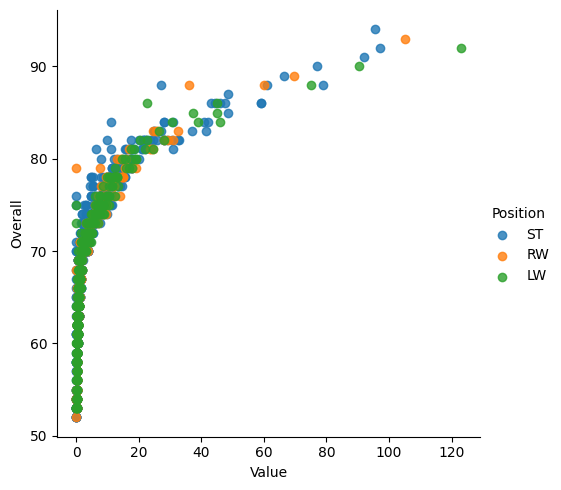

In [12]:
# Plot
sns.lmplot(x = 'Value', 
           y = 'Overall', 
           hue = 'Position', 
           data = df_dsa1.loc[df_dsa1['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg = False);

A cor fornece um visual esteticamente agradável, mas pode ser difícil de analisar o gráfico. Outro exemplo de encoding visual é a **forma** do marcador:

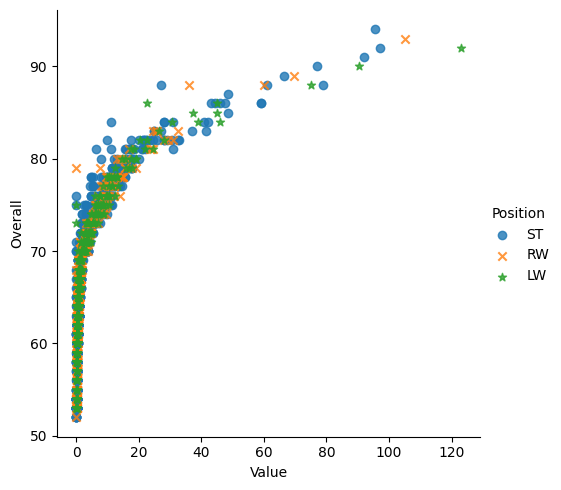

In [13]:
# Plot
sns.lmplot(x = 'Value', 
           y = 'Overall', 
           markers = ['o', 'x', '*'], 
           hue = 'Position',
           data = df_dsa1.loc[df_dsa1['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg = False);

### Ajustando os Dados Para o Multivariate Scatter Plot

In [14]:
df_dsa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17500 non-null  object 
 1   Age                  17500 non-null  int64  
 2   Photo                17500 non-null  object 
 3   Nationality          17500 non-null  object 
 4   Flag                 17500 non-null  object 
 5   Overall              17500 non-null  int64  
 6   Potential            17500 non-null  int64  
 7   Club                 17253 non-null  object 
 8   Club Logo            17500 non-null  object 
 9   Value                17500 non-null  float64
 10  Wage                 17500 non-null  object 
 11  Special              17500 non-null  int64  
 12  Acceleration         17500 non-null  object 
 13  Aggression           17500 non-null  object 
 14  Agility              17500 non-null  object 
 15  Balance              17500 non-null 

In [19]:
# Ajustando o tipo de dado de algumas colunas
cols_to_convert = ['Overall', 'Potential', 'Acceleration', 'Dribbling', 'Finishing', 'Strength']
df_dsa1[cols_to_convert] = df_dsa1[cols_to_convert].apply(pd.to_numeric, errors = 'coerce')

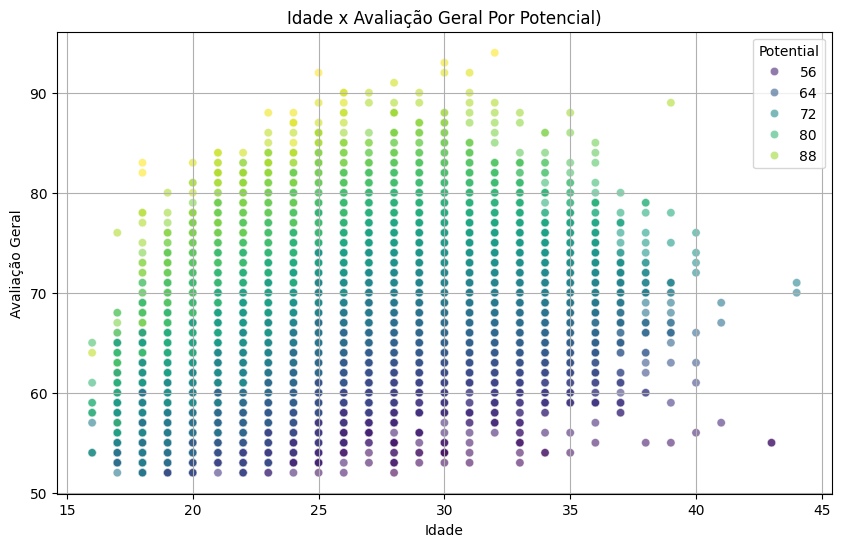

In [20]:
# Plot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_dsa1, x = 'Age', y = 'Overall', hue = 'Potential', palette = 'viridis', alpha = 0.6)
plt.title('Idade x Avaliação Geral Por Potencial)')
plt.xlabel('Idade')
plt.ylabel('Avaliação Geral')
plt.grid(True)
plt.show()

### Grouped Box Plot

Outro gráfico para análise multivariada é o box plot agrupado. Este gráfico aproveita o **agrupamento**. Suponha que estejamos interessados na seguinte questão: Os Atacantes pontuam mais em “Agressão” do que os Goleiros?

In [21]:
# Prepara os dados
df = (df_dsa1.loc[df_dsa1['Position'].isin(['ST', 'GK'])].loc[:, ['Value', 'Overall', 'Aggression', 'Position']])
df = df[df["Overall"] >= 80]
df = df[df["Overall"] < 85]
df['Aggression'] = df['Aggression'].astype(float)

https://seaborn.pydata.org/generated/seaborn.boxplot.html

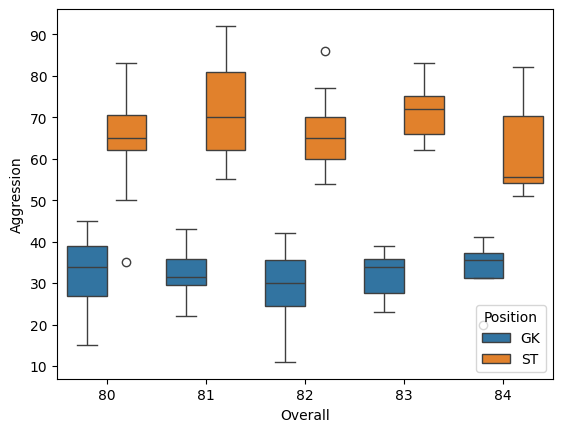

In [22]:
# Plot
sns.boxplot(x = "Overall", 
            y = "Aggression", 
            hue = 'Position', 
            data = df);

Como você pode observar, este gráfico demonstra conclusivamente que, em nosso conjunto de dados, os goleiros (pelo menos aqueles com uma pontuação geral entre 80 e 85) têm pontuações de Agressão mais baixas do que os atacantes.

Neste gráfico, o eixo horizontal representa a pontuação `Geral`, o eixo vertical representa a pontuação `Agressão` e o agrupamento codifica a `Posição`.

O agrupamento é uma variável visual extremamente comunicativa e torna este gráfico muito fácil de interpretar. No entanto, tem cardinalidade muito baixa; é muito difícil usar grupos para ajustar mais do que um punhado de valores categóricos. 

## Trabalhando com o Dataset 2

In [23]:
# Carrega o dataset
# Dataset Pokemon
df_dsa2 = pd.read_csv("./datasets_cap5/dataset2.csv", index_col = 0)

In [24]:
# Shape
df_dsa2.shape

(800, 12)

In [16]:
# Amostra
df_dsa2.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Mapa de Calor (Heatmap)

Provavelmente, a visualização mais usada em análise multivariada é o **gráfico de correlação**, o qual mede a correlação entre cada par de valores em um conjunto de dados e representa graficamente um resultado em cores.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

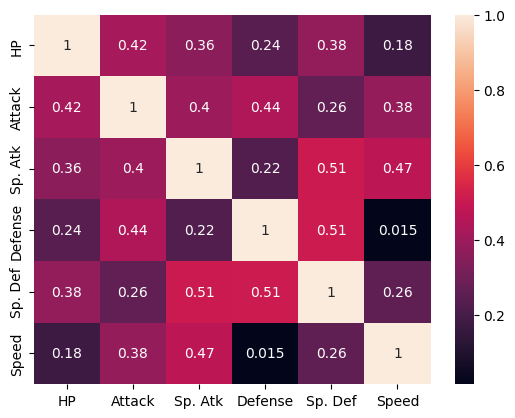

In [25]:
# Plot
sns.heatmap(df_dsa2.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr(),
            annot = True);

## Swarmplot

Um Swarmplot é um tipo de gráfico de dispersão que é usado para mostrar a distribuição de dados categóricos, semelhante a um gráfico de caixa (boxplot) ou um gráfico de violino (violin plot). No entanto, o que distingue um Swarmplot é a maneira como ele representa cada ponto de dados individualmente, sem sobreposição, proporcionando uma representação clara da distribuição dos dados. 

In [26]:
# Ajusta os dados
top_types = df_dsa2['Type 1'].value_counts()[:10] 
df_filtro = df_dsa2[df_dsa2['Type 1'].isin(top_types.index)] 

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

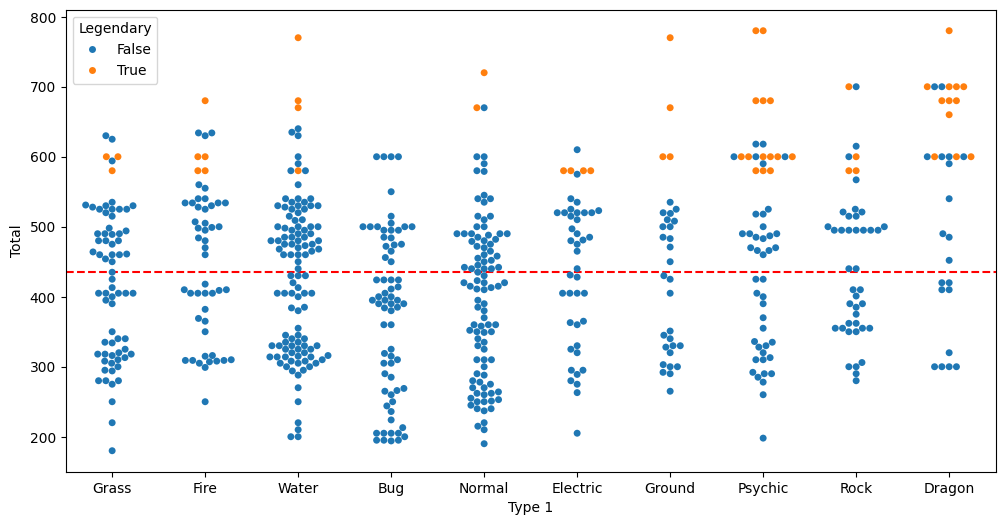

In [27]:
# Plot
plt.figure(figsize = (12,6))
sns.swarmplot(x = 'Type 1', y = 'Total', data = df_filtro, hue = 'Legendary') 
plt.axhline(df_filtro['Total'].mean(), color = 'red', linestyle = 'dashed')
plt.show()

### Parallel Coordinates

Um **gráfico de coordenadas paralelas** fornece outra maneira de visualizar dados em muitas variáveis.

In [28]:
# Filtra os dados por linha e por coluna
dados = (df_dsa2[(df_dsa2['Type 1'].isin(["Psychic", "Fighting"]))]
             .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']])

https://pandas.pydata.org/docs/user_guide/visualization.html

<Axes: >

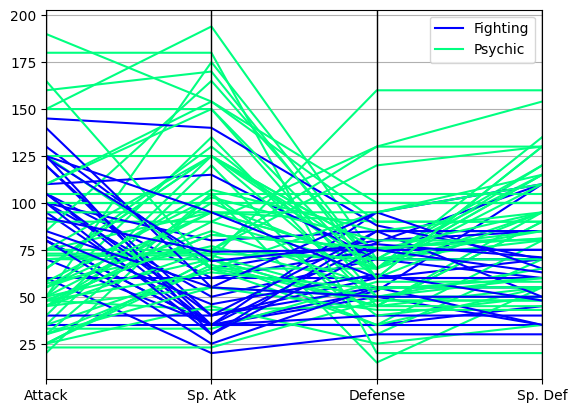

In [29]:
parallel_coordinates(dados, 'Type 1', colormap = "winter")

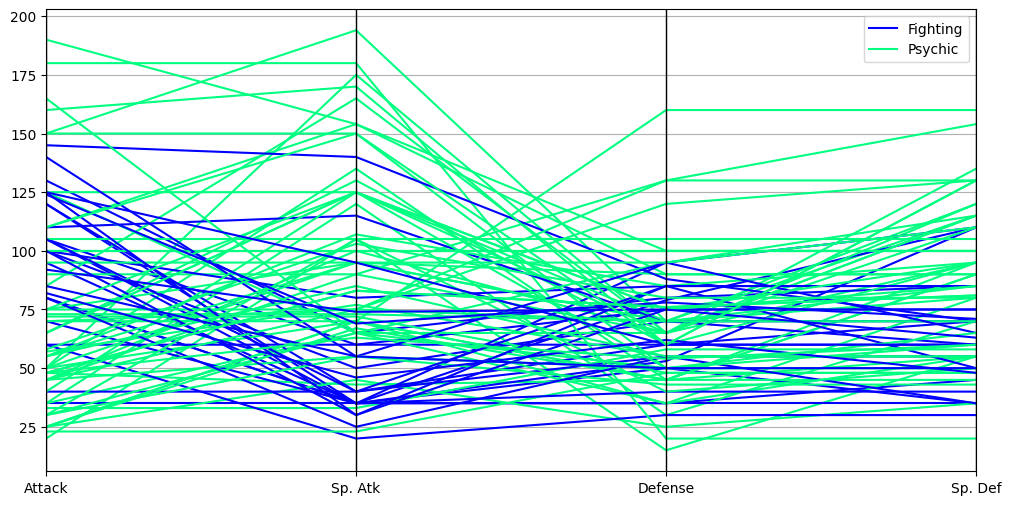

In [30]:
# Plot
plt.figure(figsize = (12,6))
parallel_coordinates(dados, 'Type 1', colormap = "winter")
plt.show()

## Trabalhando com o Dataset 3

In [31]:
# Carrega o dataset
# Dataset Flowers
df_dsa3 = pd.read_csv("./datasets_cap5/dataset3.csv")

In [32]:
# Shape
df_dsa3.shape

(150, 5)

In [33]:
# Amostra
df_dsa3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Gráfico de Pares (Pair Plots)

Os gráficos de pares mostram todas as relações de par entre um conjunto de variáveis. Cada par de variáveis é representado por um gráfico de dispersão.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

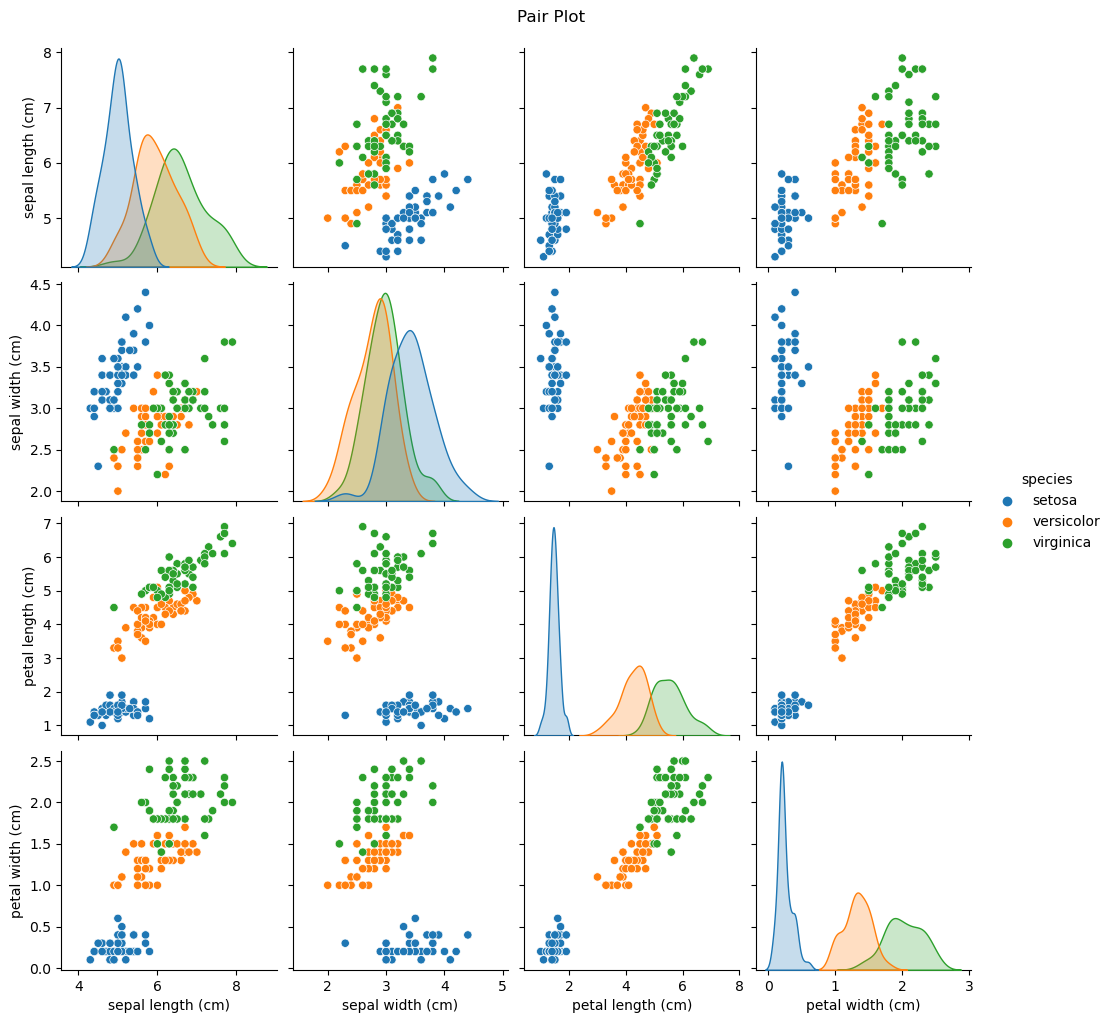

In [26]:
# Plot
sns.pairplot(df_dsa3, hue = 'species')
plt.suptitle("Pair Plot", y = 1.02)
plt.show()

### Gráfico de Radar (Radar Chart)

Útil para comparar vários pontos de dados multivariados. Cada eixo do gráfico representa uma variável e os valores são plotados como pontos ao longo do eixo, conectados por linhas.

In [34]:
# Organiza os labels
labels = np.array(['sepal length', 'sepal width', 'petal length', 'petal width'])

In [35]:
# Exclui a coluna 'species' ao calcular a média
stats = df_dsa3.drop('species', axis=1).mean().values  

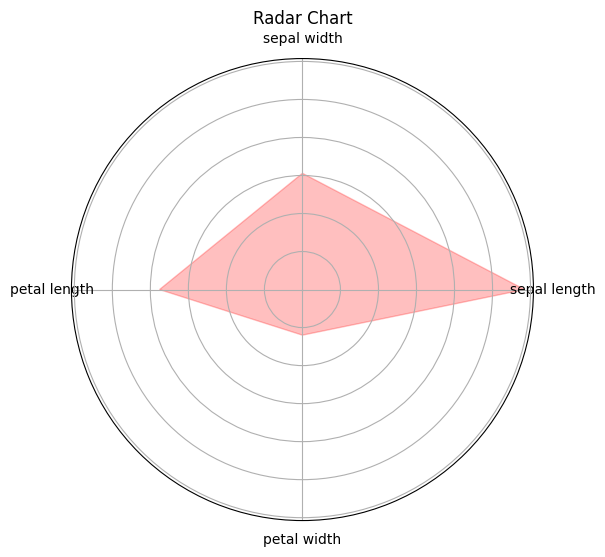

In [36]:
# Cria o gráfico
angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False).tolist()
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))
ax.fill(angles, stats, color = 'red', alpha = 0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart")
plt.show()

### Gráfico de Violino (Violin Plot)

Semelhante aos box plots, mas também inclui a densidade de kernel dos dados, fornecendo uma representação mais rica da distribuição de dados.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

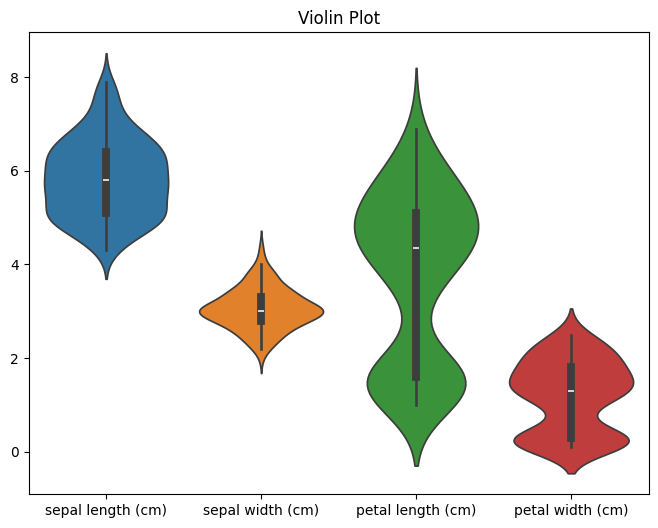

In [37]:
# Plot
plt.figure(figsize = (8, 6))
sns.violinplot(data = df_dsa3.drop('species', axis = 1))
plt.title("Violin Plot")
plt.show()

### tSNE (t-distributed Stochastic Neighbor Embedding)

O t-SNE é uma técnica avançada para redução de dimensionalidade, amplamente utilizada para a visualização de dados de alta dimensionalidade em um espaço de baixa dimensão (geralmente duas ou três dimensões). Desenvolvido por Laurens van der Maaten e Geoffrey Hinton, o t-SNE é particularmente eficaz na visualização de conjuntos de dados complexos de Machine Learning ou de conjuntos de dados com muitas variáveis.

In [38]:
# Cria o modelo com 2 dimensões
tsne_dsa = TSNE(n_components = 2, random_state = 0)

In [39]:
# Treina o modelo com os dados multidimensionais
modelo_tsne = tsne_dsa.fit_transform(df_dsa3.drop('species', axis = 1))

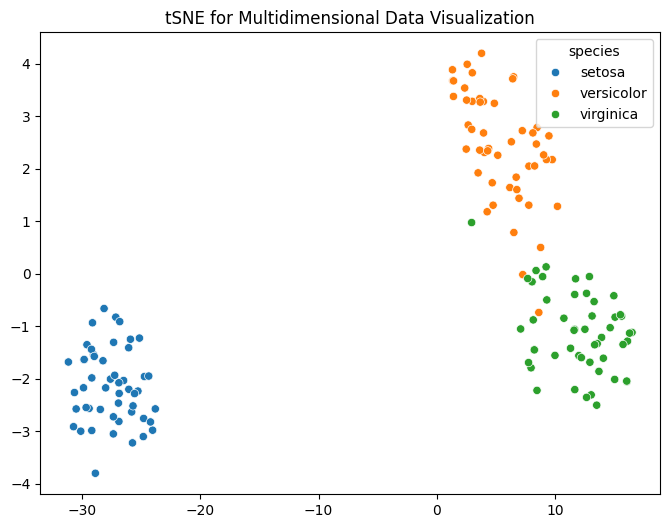

In [40]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(x = modelo_tsne[:, 0], y = modelo_tsne[:, 1], hue = df_dsa3['species'])
plt.title("tSNE for Multidimensional Data Visualization")
plt.show()

In [34]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [35]:
#%watermark -v -m

In [36]:
#%watermark --iversions

# Fim